## Inferential statistics

### Inferential Statistics
 - Population : a set of examples
 - Sample : a proper subset of a population
 - Goal : Estimate some statistic about the population based on statistics about the sample
 - Key fact : If the sample is random, it tends to exhibit the same properties as the population from which it is drawn

### Why the Difference in Confidence?
 - Confidence in our estimated depends upon two things
 - Size of sample
 - Variance of sample
 - As the variance grows, we need larger samples to have the same degree of confidence

In [1]:
from lecture7_segment1 import *

In [2]:
numSpins = 1
game = FairRoulette()
playRoulette(game, numSpins)

1 spins of Fair Roulette
Expected return betting red = 100.0%
Expected return betting black = -100.0%
Expected return betting 2 = -100.0%



(1.0, -1.0, -1.0)

In [3]:
numSpins = 1
game = FairRoulette()
playRoulette(game, numSpins)

1 spins of Fair Roulette
Expected return betting red = 100.0%
Expected return betting black = -100.0%
Expected return betting 2 = -100.0%



(1.0, -1.0, -1.0)

In [4]:
numSpins = 100
game = FairRoulette()
playRoulette(game, numSpins)

100 spins of Fair Roulette
Expected return betting red = -10.0%
Expected return betting black = 10.0%
Expected return betting 2 = -28.0%



(-0.1, 0.1, -0.28)

In [5]:
numSpins = 100
game = FairRoulette()
playRoulette(game, numSpins)

100 spins of Fair Roulette
Expected return betting red = 6.0%
Expected return betting black = -6.0%
Expected return betting 2 = 8.0%



(0.06, -0.06, 0.08)

In [6]:
numSpins = 10000
game = FairRoulette()
playRoulette(game, numSpins)

10000 spins of Fair Roulette
Expected return betting red = 1.32%
Expected return betting black = -1.32%
Expected return betting 2 = -2.8%



(0.0132, -0.0132, -0.028)

In [7]:
numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Roulette
Expected return betting red = -0.037%
Expected return betting black = 0.037%
Expected return betting 2 = 0.0728%



(-0.00037, 0.00037, 0.000728)

In [8]:
numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Roulette
Expected return betting red = -0.1908%
Expected return betting black = 0.1908%
Expected return betting 2 = 0.26%



(-0.001908, 0.001908, 0.0026)

In [9]:
numSpins = 1000000
game = FairRoulette()
playRoulette(game, numSpins)

1000000 spins of Fair Roulette
Expected return betting red = -0.0186%
Expected return betting black = 0.0186%
Expected return betting 2 = -0.2944%



(-0.000186, 0.000186, -0.002944)

### Law of Large Numbers (LLN)
- In repeated independent tests with the same actual probability *p* of a particular outcome in each test, the chance that the fraction of times that outcome occurs differs from *p* converges to zero as the number of trials goes to infinity.

### Gambler's Fallacy
- If deviations from expected behavior occur, these deviations are likely to be evened out by opposite deviations in the future

- Probability of 15 consecutive reds : 1/32378
- Probability of 25 consecutive reds : 1/33554432
- Probability of 26 consecutive reds : 1/67108865
- Probability of 26 consecutive reds when previous 25 rolls were red : **1/2**

### Regression to the Mean
- Following an extreme random event, the next random event is likely to be less extreme
- If you spin a fair roulette wheel 10 times and get 100% reds, that is an extreme event (probability = 1/1024)
- It is like that in the next 10 spins, you will get fewer than 10 reds
- So, if you look at the average of the 20 spins, it will be closer to the expected mean of 50% reds than to the 100% you saw in the first 10 spins

## Variation in Data

In [10]:
from lecture7_segment2 import *

In [11]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000, 100000):
    print('\nSimulate betting a pocket for', numTrials,
          'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        print('Exp. return for', G(), '=',
             str(100*sum(pocketReturns)/float(len(pocketReturns))) + '%')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.199999999999998%
Exp. return for European Roulette = -8.200000000000001%
Exp. return for American Roulette = 2.599999999999998%

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.760000000000002%
Exp. return for European Roulette = -2.4399999999999995%
Exp. return for American Roulette = -9.46%

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.3060000000000003%
Exp. return for European Roulette = -4.095999999999999%
Exp. return for American Roulette = -5.698000000000001%

Simulate betting a pocket for 20 trials of 100000 spins each
Exp. return for Fair Roulette = 0.7982%
Exp. return for European Roulette = -2.5876000000000006%
Exp. return for American Roulette = -5.134600000000001%


### Sampling Space of Possible Outcomes
- Never possible to guarantee perfect accuracy through sampling
- Not to say that an estimate is not precisely correct
- How many samples do we need to look at before we can have justified confidence on our answer?
    - Depeds upon variability in underlying distribution

### Quantifying Variation in Data

$$ Var(X) = \frac{\sum_{x \in X}(x- \mu)^2}{|n|} $$

$$ \sigma(X) = \sqrt{\frac{1}{|x|}\sum_{x \in X}(x-\mu)^2} $$

- Standard deviation simply the square root of the variance
- Outliers can have a big effect
- Standard deviation should always be considered relative to mean

### Code
```python
def getMeanAndStd(X):
    mean = sum(X) / float(len(X))
    tot = 0.0
    for x in X:
        tot += (x - mean) ** 2
    std = (tot / len(X)) ** 0.5
    return mean, std
```

### Confidence Levels and Intervals
- Instead of estimating an unknown parameter by a single value (e.g., the mean of a set of trials), a confidence interval provides a range that is likely to contain the unknown value and a confidence that the unknown value lays within that range

- "The return on betting on 2 twenty times in European roulette is -3.3%. The margin of error is $\pm$ 1% with a 95% level of confidence"

### Empirical Rule
- Under some assumptions discussed later
    - ~ 68% of data within $\sigma$ of mean
    - ~ 95% of data within 2 $\sigma$ of mean
    - ~ 99.7% of data within 3 $\sigma$ of mean

In [12]:
random.seed(0)
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
   resultDict[G().__str__()] = []
for numSpins in (100, 1000, 10000):
   print('\nSimulate betting a pocket for', numTrials,
         'trials of', numSpins, 'spins each')
   for G in games:
       pocketReturns = findPocketReturn(G(), 20, numSpins, False)
       mean, std = getMeanAndStd(pocketReturns)
       resultDict[G().__str__()].append((numSpins,
                                         100*mean, 100*std))
       print('Exp. return for', G(), '=', str(round(100*mean, 3))
             + '%,', '±' + str(round(100*1.96*std, 3))
             + '% with 95% confidence')


Simulate betting a pocket for 20 trials of 100 spins each
Exp. return for Fair Roulette = 6.2%, ±152.114% with 95% confidence
Exp. return for European Roulette = -8.2%, ±90.567% with 95% confidence
Exp. return for American Roulette = 2.6%, ±92.74% with 95% confidence

Simulate betting a pocket for 20 trials of 1000 spins each
Exp. return for Fair Roulette = 4.76%, ±39.658% with 95% confidence
Exp. return for European Roulette = -2.44%, ±31.31% with 95% confidence
Exp. return for American Roulette = -9.46%, ±36.273% with 95% confidence

Simulate betting a pocket for 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.306%, ±9.295% with 95% confidence
Exp. return for European Roulette = -4.096%, ±10.902% with 95% confidence
Exp. return for American Roulette = -5.698%, ±11.077% with 95% confidence


## Distributions

In [13]:
from lecture7_segment3 import *

### Empirical Rule
- Two key assumptions
    - The mean estimation error is zero
    - The distribution of the errors in the estimates is normal

### Defining Distributions
- Use a probability distribution
- Captures notion of relative frequency with which a random variable takes on certain values
    - Discrete random variables drawn from finite set of values
    - Continuous random variables drawn from reals between two numbers (i.e., infinite set of values)
- For discrete variable, simply list the probability of each value, must add up to 1
- Continuous case tricker, can't enumerate probability for each of an infinite set of values

### Probability Density Functions (PDF)
- Probability of a random variable lying between two values
- Defines a curve where te values on the x-axis lie between minimum and maximum value of the variable
- Area under curve between two points, is probability of example falling within that range

### Normal Distributions
$$ P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{(x-\mu)^2}{2 \sigma^2}} $$

$$ e = \sum^{\infty}_{n=0}\frac{1}{n!} $$

### Why We Like Normal Distributions
- Nice mathematical properties
- Occur a lot!!

(array([5.0000e+00, 1.2000e+01, 2.6000e+01, 7.2000e+01, 2.0100e+02,
        4.1600e+02, 9.0300e+02, 1.5840e+03, 2.7440e+03, 4.1900e+03,
        6.1070e+03, 8.0960e+03, 1.0133e+04, 1.1084e+04, 1.1470e+04,
        1.0807e+04, 9.6370e+03, 7.7420e+03, 5.6880e+03, 3.8930e+03,
        2.4510e+03, 1.3330e+03, 7.5400e+02, 3.9400e+02, 1.5000e+02,
        6.5000e+01, 2.8000e+01, 8.0000e+00, 4.0000e+00, 3.0000e+00]),
 array([-124.99474249, -116.30776561, -107.62078873,  -98.93381185,
         -90.24683497,  -81.55985809,  -72.87288121,  -64.18590433,
         -55.49892744,  -46.81195056,  -38.12497368,  -29.4379968 ,
         -20.75101992,  -12.06404304,   -3.37706616,    5.30991072,
          13.9968876 ,   22.68386448,   31.37084136,   40.05781824,
          48.74479512,   57.43177201,   66.11874889,   74.80572577,
          83.49270265,   92.17967953,  100.86665641,  109.55363329,
         118.24061017,  126.92758705,  135.61456393]),
 <a list of 30 Patch objects>)

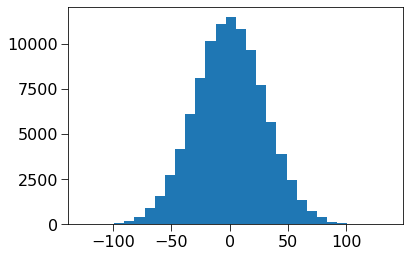

In [14]:
import pylab, random
dist = []
for i in range(100000):
    dist.append(random.gauss(0, 30))
pylab.hist(dist, 30)

### A Digression
- SciPy library contains my useful mathematical functions used by scientists and engineers
- scipy.integrate.guad has up to four arguments
    - a function of method to be integrated
    - a number representing the lower limit of the integration
    - a number representing the upper limit of the integration
    - an option tuple supplying values for all arguments except the first, of the function to be integrated
- scipy.integrate.quad returns a tuple
    - Approximation to result
    - Estimate of absolute error

### Code
```python 
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2
    
def checkEmpirical(numTrials):
  for t in range(numTrials):
     mu = random.randint(-10, 10)
     sigma = random.randint(1, 10)
     print('For mu =', mu, 'and sigma =', sigma)
     for numStd in (1, 1.96, 3):
        area = scipy.integrate.quad(gaussian,
                                    mu-numStd*sigma,
                                    mu+numStd*sigma,
                                    (mu, sigma))[0]
        print('  Fraction within', numStd, 'std =', round(area, 4))
```

In [15]:
checkEmpirical(3)

For mu = -9 and sigma = 10
  Fraction within 1 std = 0.6827
  Fraction within 1.96 std = 0.95
  Fraction within 3 std = 0.9973
For mu = -6 and sigma = 5
  Fraction within 1 std = 0.6827
  Fraction within 1.96 std = 0.95
  Fraction within 3 std = 0.9973
For mu = -7 and sigma = 8
  Fraction within 1 std = 0.6827
  Fraction within 1.96 std = 0.95
  Fraction within 3 std = 0.9973
